In [52]:
import spacy
pln = spacy.load('pt_core_news_sm')

In [53]:
textoEntrada = ' Rafael é o cara que diz: O rato roeu a roupa do rei de Roma'
entrada = pln(textoEntrada)


listaItensEntrada = textoEntrada.split(" ")
#pode ser un arquivo de texto igual na nossa atividade da aula...

i = 8
print(listaItensEntrada[i])

print(listaItensEntrada[i-1])

print(listaItensEntrada[i+1])



rato
O
roeu


In [54]:
for entidade in entrada.ents:
    print(entidade)
    print(entidade.label_)



Rafael
PER
Roma
LOC


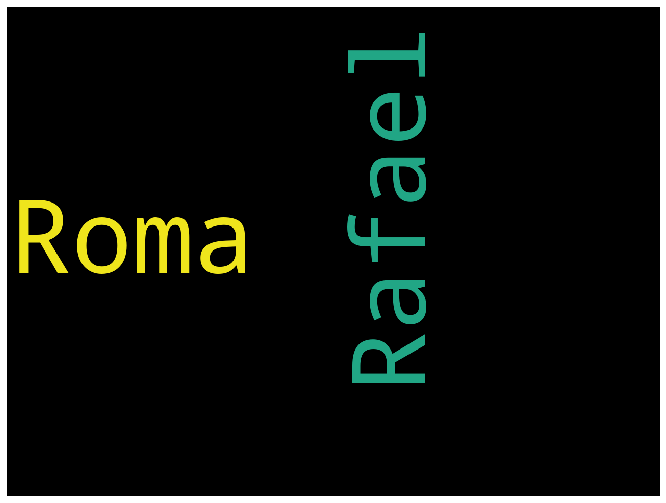

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

conteudo = open('entrada.txt','r').read()
wordcloud = WordCloud(max_font_size=200,width = 1280, height = 960).generate(str(entrada.ents))

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 1) Encontre as entidades mais frequentes de um livro à sua escolha em
https://archive.org/details/booksbylanguage_portuguese?and[]=subject%3A%22Brazil%22

Contabilize a frequência (TF) verifique a TF-IDF ds Entidades e as palavras vizinhas mais frequentes.

Para compor o corpora pode ser interessante assumir cada capítulo do livro (ou bloco) como um documento


# 2) Construir uma nuvem de personagens mais presentes no livro:
        ver http://localhost:8888/notebooks/nuvemDeTags.ipynb

# Resolução #############

Não é a única possibilidade, okay?

In [102]:
from requests import get

url = 'https://archive.org/stream/CaminhoDasBorboletas/Caminho%20Das%20Borboletas_djvu.txt'
file = urllib.request.urlopen(url)


from bs4 import BeautifulSoup
cleantext = BeautifulSoup(file, "lxml").text

# cleantext

In [98]:
import spacy
pln = spacy.load('pt_core_news_sm')
entrada = pln(cleantext)
        

In [116]:
entidadePEssoas = [] #pessoas
entidadeLocais = [] #locais
entidadeORG = [] #organizações
entidadeMISC = [] #diversas (não identificadas)

setTiposEntidades = set()

for entidade in entrada.ents:
#     print(entidade.label_)
#     print(entidade.label_)
    setTiposEntidades.add(entidade.label_)
    if entidade.label_ == 'PER':
        entidadePEssoas.append(entidade)
        
    elif entidade.label_ =='LOC':
#         print(entidade)
        entidadeLocais.append(entidade)
    elif entidade.label_ =='ORG':
        entidadeORG.append(entidade)
    elif entidade.label_ =='MISC':
        entidadeMISC.append(entidade)
setTiposEntidades

{'LOC', 'MISC', 'ORG', 'PER'}

<function matplotlib.pyplot.show(*args, **kw)>

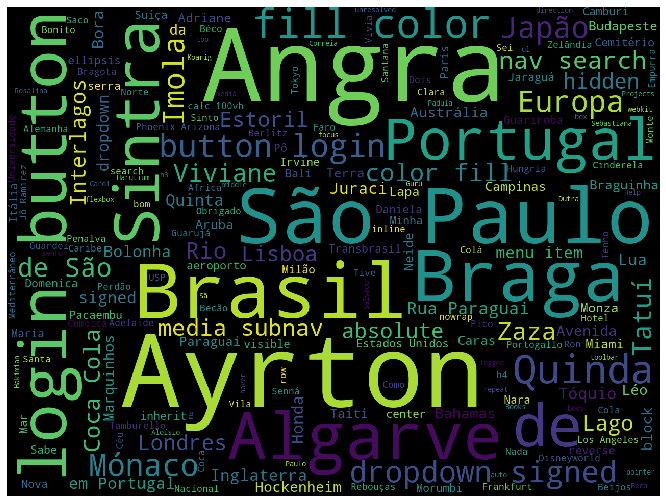

In [118]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# entidades = entidadePEssoas
entidades = entidadeLocais
# entidades = entidadeORG
# entidades = entidadeMISC

# entidades = entidadePEssoas

wordcloud = WordCloud(max_font_size=200,width = 1280, height = 960).generate(str(entidades))

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show